## Start

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv",index_col=False)

In [4]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [5]:
df.shape

(103, 7)

### Data Cleaning

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             0
Yield (Kg / Hectare)          0
dtype: int64

In [9]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [10]:
df.columns

Index(['Unnamed: 0', 'Country', 'Continent', 'Production (Tons)',
       'Production per Person (Kg)', 'Acreage (Hectare)',
       'Yield (Kg / Hectare)'],
      dtype='object')

In [11]:
for i in range(3,7):
    if(df.columns[i]=="Yield (Kg / Hectare)"):
        df[df.columns[i]] = df[df.columns[i]].str.replace('.','')
        df[df.columns[i]] = df[df.columns[i]].str.replace(',','.')
        df[df.columns[i]] = df[df.columns[i]].astype("float")
        continue
    df[df.columns[i]] = df[df.columns[i]].str.replace('.','')
    df[df.columns[i]] = df[df.columns[i]].str.replace(',','')
    df[df.columns[i]] = df[df.columns[i]].astype("int")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  102 non-null    int64  
 1   Country                     102 non-null    object 
 2   Continent                   102 non-null    object 
 3   Production (Tons)           102 non-null    int64  
 4   Production per Person (Kg)  102 non-null    int64  
 5   Acreage (Hectare)           102 non-null    int64  
 6   Yield (Kg / Hectare)        102 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 6.4+ KB


In [13]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879.0


In [14]:
#Renaming columns for easy access
df.rename(columns = {"Production (Tons)":"Production(Tons)","Production per Person (Kg)":"Production_per_person(Kg)","Acreage (Hectare)":"Acreage(Hectare)","Yield (Kg / Hectare)":"Yield(Kg / Hectare)"},inplace=True)

In [15]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879.0


In [16]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             0
Yield(Kg / Hectare)          0
dtype: int64

In [17]:
df.reset_index(inplace=True,drop=True)

In [18]:
df

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879.0
...,...,...,...,...,...,...,...
97,97,Spain,Europe,394,8,9,43596.5
98,98,Lebanon,Asia,97,16,3,28386.4
99,100,Singapore,Asia,50,9,2,25.0
100,101,Samoa,Oceania,12,6,1,11949.8


In [19]:
del df["Unnamed: 0"]

In [20]:
df.head(3)

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382,3668531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1


In [21]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)               int64
Production_per_person(Kg)      int64
Acreage(Hectare)               int64
Yield(Kg / Hectare)          float64
dtype: object

In [22]:
df[df.duplicated(keep = False)] # No duplicaate values present

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare)


### Univariate Analysis

#### How many countries produce sugarcane from each continent 

In [25]:
df["Continent"].unique()

array(['South America', 'Asia', 'North America', 'Oceania', 'Africa',
       'Europe'], dtype=object)

In [26]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

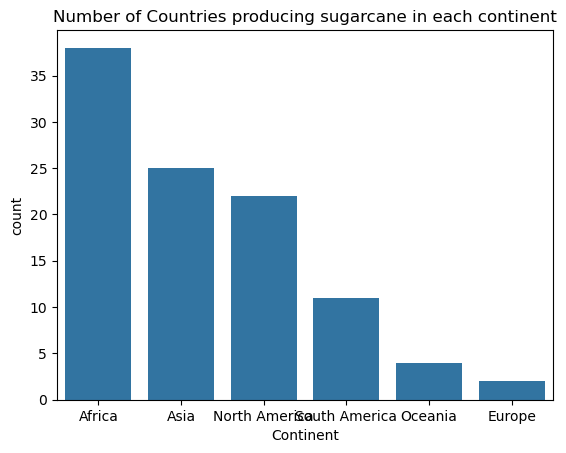

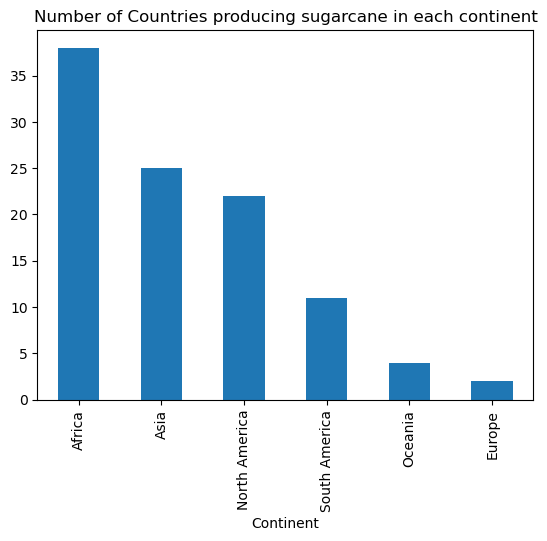

In [28]:
sns.barplot(data=df["Continent"].value_counts())
plt.title("Number of Countries producing sugarcane in each continent")
plt.show()
df["Continent"].value_counts().plot(kind="bar")
plt.title("Number of Countries producing sugarcane in each continent")
plt.show()

In [29]:
df["Continent"].value_counts().index

Index(['Africa', 'Asia', 'North America', 'South America', 'Oceania',
       'Europe'],
      dtype='object', name='Continent')

In [30]:
data_1 = pd.DataFrame(df["Continent"].value_counts())
data_1.rename(columns = {"count":"Number Of Countries"})

,Number Of Countries
Continent,
Africa,38
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


In [31]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382,3668531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879.0


<Axes: xlabel='Production(Tons)', ylabel='Density'>

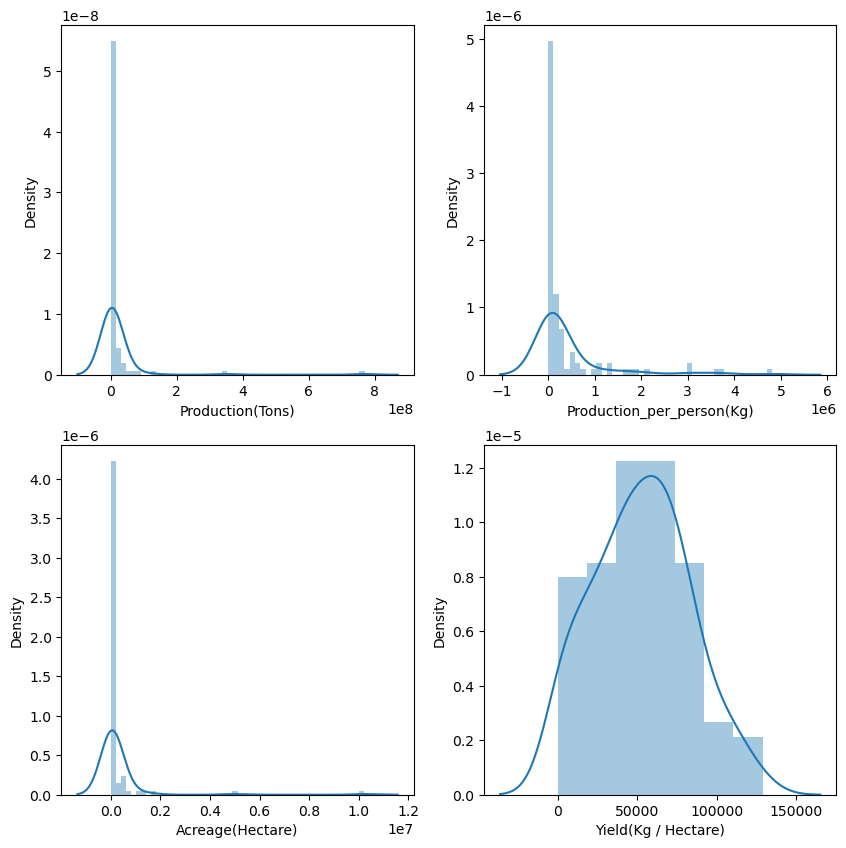

In [32]:
#Plotting distribution of numerical categories side by side
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production_per_person(Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg / Hectare)"])
plt.subplot(2,2,1)

<Axes: ylabel='Production(Tons)'>

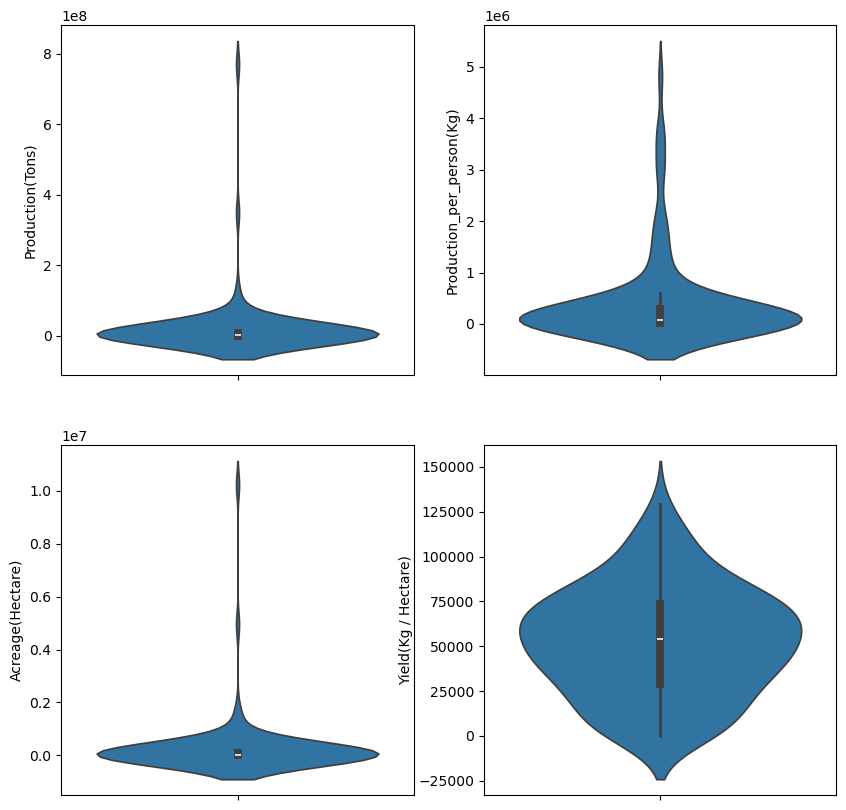

In [33]:
#Plotting outliers using box plot of numerical categories side by side
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.violinplot(df["Production_per_person(Kg)"])
plt.subplot(2,2,3)
sns.violinplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.violinplot(df["Yield(Kg / Hectare)"])
plt.subplot(2,2,1)

In [34]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
count,1.020000e+02,1.020000e+02,1.020000e+02,102.000000
mean,1.850372e+07,4.124805e+05,2.498981e+05,52628.078431
std,8.419149e+07,8.669140e+05,1.137003e+06,30504.676683
min,1.000000e+00,0.000000e+00,0.000000e+00,10.000000
25%,6.251875e+04,1.075225e+04,1.104000e+03,29072.025000
50%,1.440044e+06,8.135850e+04,1.655800e+04,54108.950000
75%,6.426824e+06,2.828128e+05,8.047400e+04,73282.700000
max,7.686784e+08,4.816299e+06,1.022620e+07,129049.300000


### Bivariate Analysis

In [36]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382,3668531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879.0


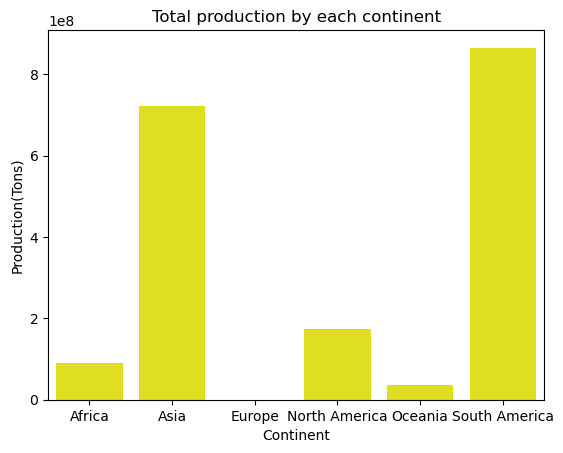

In [37]:
# Plot a bar graph between Continent and Total production by each continent
continent_prod = df.groupby("Continent")["Production(Tons)"].sum()
sns.barplot(continent_prod,color="yellow")
plt.title("Total production by each continent")
plt.show()

#### Which country produces max Sugarcane ?

In [39]:
df[df["Production(Tons)"]==df["Production(Tons)"].max()]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382,3668531,10226205,75167.5


In [40]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382,3668531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879.0


In [41]:
# Percentage contribution of each country to total sugarcane production
df["Percentage_prod"] = df["Production(Tons)"]/df["Production(Tons)"].sum() *100

In [42]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Percentage_prod
0,Brazil,South America,768678382,3668531,10226205,75167.5,40.727285
1,India,Asia,348448000,260721,4950000,70393.5,18.462001
2,China,Asia,123059739,88287,1675215,73459.1,6.520138
3,Thailand,Asia,87468496,1264303,1336575,65442.2,4.634389
4,Pakistan,Asia,65450704,324219,1130820,57879.0,3.467809


<Axes: xlabel='Continent', ylabel='Percentage_prod'>

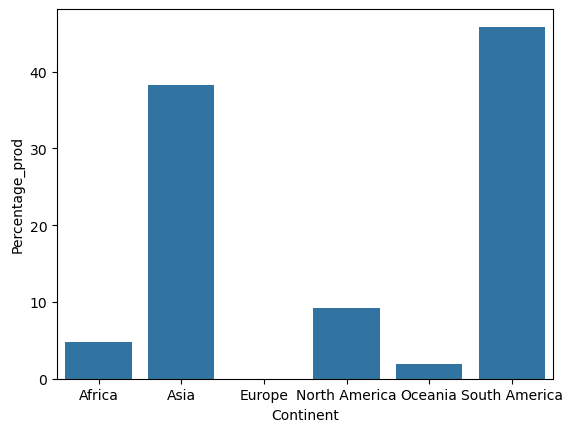

In [43]:
sns.barplot(df.groupby("Continent")["Percentage_prod"].sum())

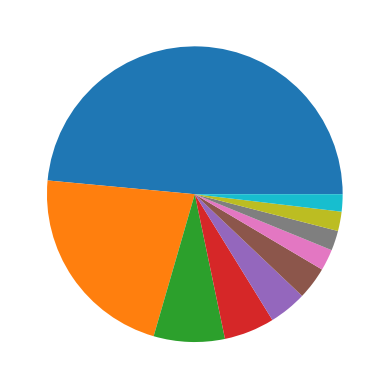

In [44]:
plt.pie(x=df["Percentage_prod"].head(10))
plt.show()

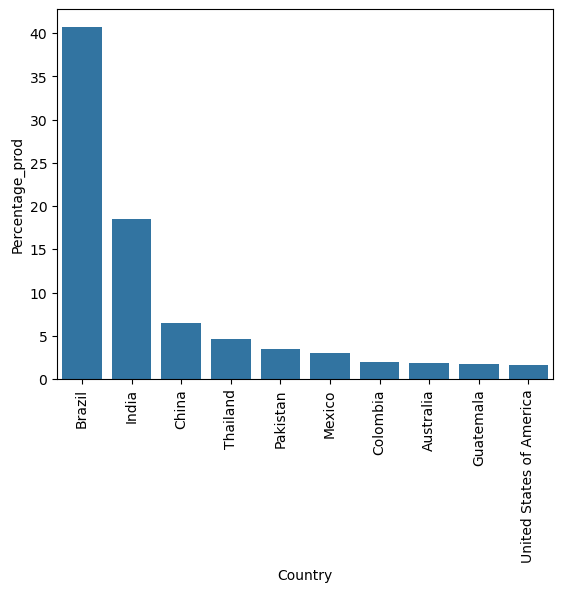

In [45]:
ax = sns.barplot(data = df.head(10),x="Country",y='Percentage_prod')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### Which country has the maximum land ?

In [47]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Percentage_prod
0,Brazil,South America,768678382,3668531,10226205,75167.5,40.727285
1,India,Asia,348448000,260721,4950000,70393.5,18.462001
2,China,Asia,123059739,88287,1675215,73459.1,6.520138
3,Thailand,Asia,87468496,1264303,1336575,65442.2,4.634389
4,Pakistan,Asia,65450704,324219,1130820,57879.0,3.467809


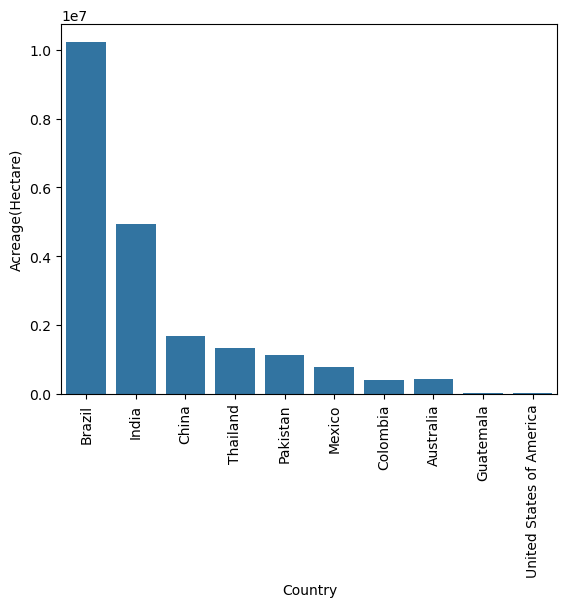

In [48]:
ax = sns.barplot(data=df.head(10),x="Country",y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [49]:
df_2 = df.sort_values("Acreage(Hectare)",ascending=False)

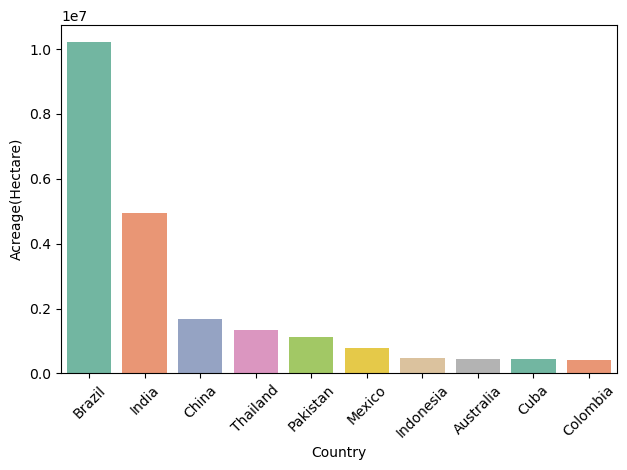

In [50]:
sns.barplot(data=df_2.head(10),x="Country",y="Acreage(Hectare)",palette = "Set2")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Which country has the highest yield per hectare

In [52]:
df_yield  = df.sort_values("Yield(Kg / Hectare)",ascending=False)

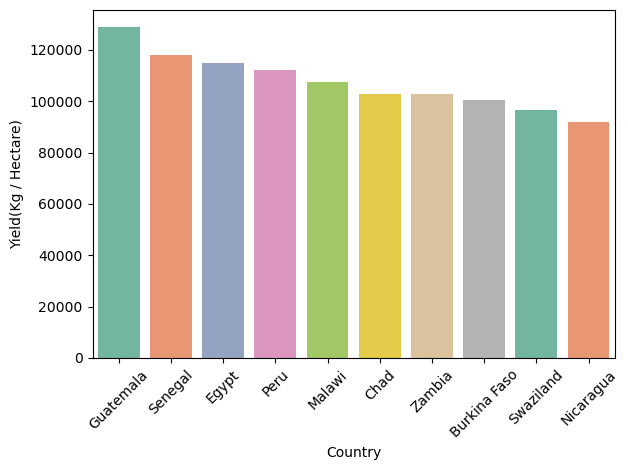

In [53]:
sns.barplot(data=df_yield.head(10),x="Country",y="Yield(Kg / Hectare)",palette = "Set2")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Which country has highest production ?

In [55]:
df.head(3)

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Percentage_prod
0,Brazil,South America,768678382,3668531,10226205,75167.5,40.727285
1,India,Asia,348448000,260721,4950000,70393.5,18.462001
2,China,Asia,123059739,88287,1675215,73459.1,6.520138


In [56]:
df_prod = df.sort_values("Production(Tons)",ascending = False)

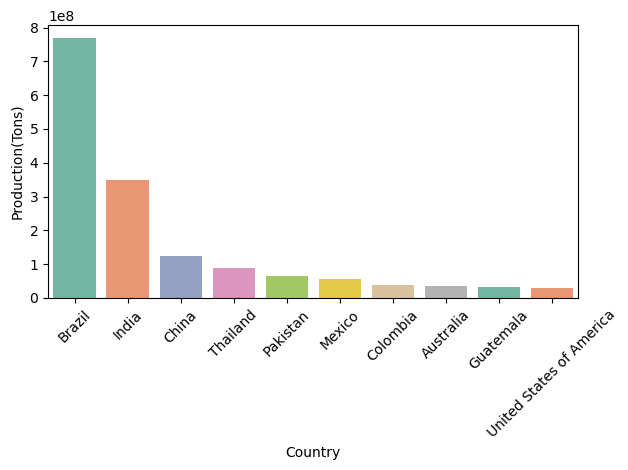

In [57]:
sns.barplot(data=df_prod.head(10),x="Country",y="Production(Tons)",palette = "Set2")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Co-relation between columns/Categories ?

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    102 non-null    object 
 1   Continent                  102 non-null    object 
 2   Production(Tons)           102 non-null    int64  
 3   Production_per_person(Kg)  102 non-null    int64  
 4   Acreage(Hectare)           102 non-null    int64  
 5   Yield(Kg / Hectare)        102 non-null    float64
 6   Percentage_prod            102 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.7+ KB


In [60]:
df.iloc[:,2:].corr()  #Separating all the integer and float values and then applying the correlation method

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Percentage_prod
Production(Tons),1.000000,0.352369,0.997550,0.132812,1.000000
Production_per_person(Kg),0.352369,1.000000,0.341974,0.220522,0.352369
Acreage(Hectare),0.997550,0.341974,1.000000,0.113433,0.997550
Yield(Kg / Hectare),0.132812,0.220522,0.113433,1.000000,0.132812
Percentage_prod,1.000000,0.352369,0.997550,0.132812,1.000000


In [61]:
#or we can do this 
df.corr(numeric_only = True)

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Percentage_prod
Production(Tons),1.000000,0.352369,0.997550,0.132812,1.000000
Production_per_person(Kg),0.352369,1.000000,0.341974,0.220522,0.352369
Acreage(Hectare),0.997550,0.341974,1.000000,0.113433,0.997550
Yield(Kg / Hectare),0.132812,0.220522,0.113433,1.000000,0.132812
Percentage_prod,1.000000,0.352369,0.997550,0.132812,1.000000


<Axes: >

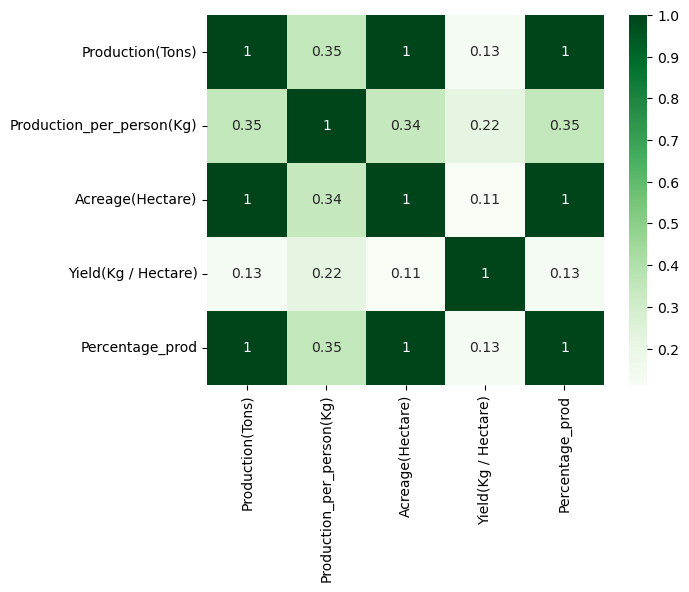

In [62]:
sns.heatmap(df.corr(numeric_only=True),cmap = "Greens",annot = True)

#### Do countries with more land produce higher ?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

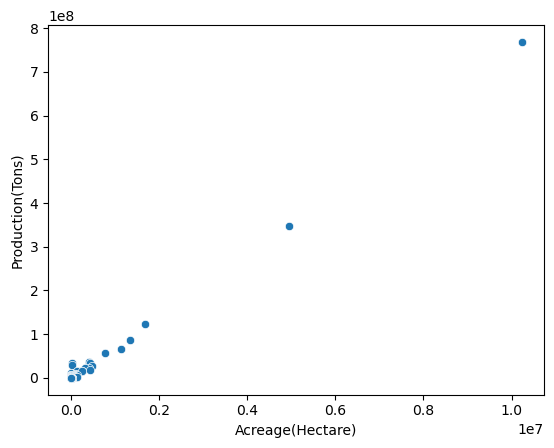

In [64]:
sns.scatterplot(data=df,x = "Acreage(Hectare)",y = "Production(Tons)")

#### Do countreis with a higher yield produce more sugarcane in total ?

<Axes: xlabel='Yield(Kg / Hectare)', ylabel='Production(Tons)'>

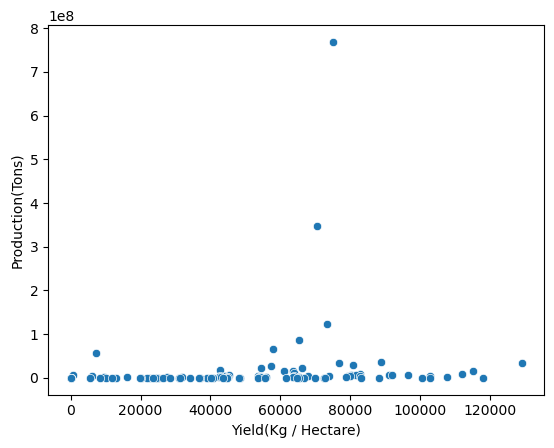

In [66]:
sns.scatterplot(data=df,y = "Production(Tons)",x ="Yield(Kg / Hectare)")

### Continent wise analysis

#### Which continent produces maximum sugarcane ?

In [69]:
df["Continent"].unique()

array(['South America', 'Asia', 'North America', 'Oceania', 'Africa',
       'Europe'], dtype=object)

In [70]:
df["Continent"].nunique()

6

In [71]:
df_2 = df.groupby("Continent")["Production(Tons)"].sum()

In [72]:
df_2.sort_values(inplace=True , ascending = False)

<Axes: xlabel='Continent', ylabel='Production(Tons)'>

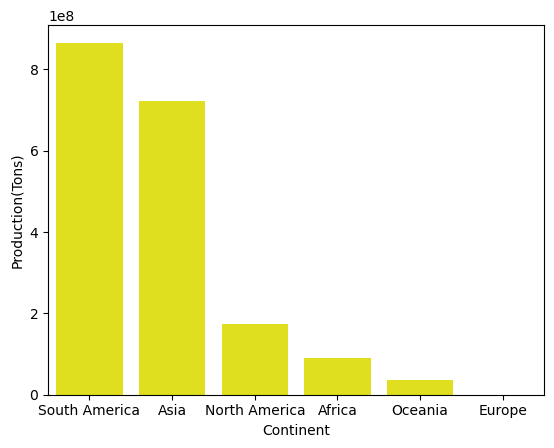

In [73]:
sns.barplot(data=df_2,color = "Yellow")

#### Which continent produces maximum land ?

In [75]:
df.head(3)

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Percentage_prod
0,Brazil,South America,768678382,3668531,10226205,75167.5,40.727285
1,India,Asia,348448000,260721,4950000,70393.5,18.462001
2,China,Asia,123059739,88287,1675215,73459.1,6.520138


<Axes: xlabel='Continent', ylabel='Acreage(Hectare)'>

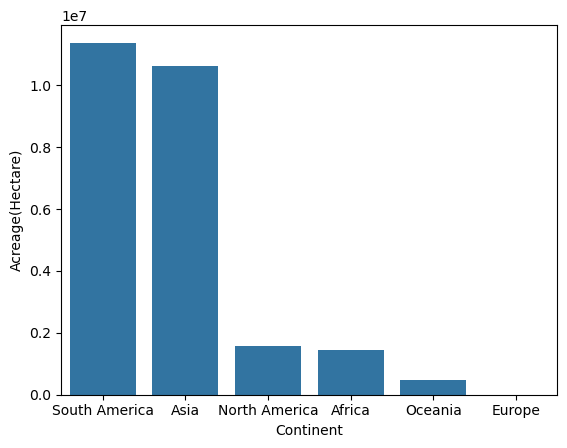

In [76]:
sns.barplot(data=df.groupby("Continent")["Acreage(Hectare)"].sum().sort_values(ascending= False))

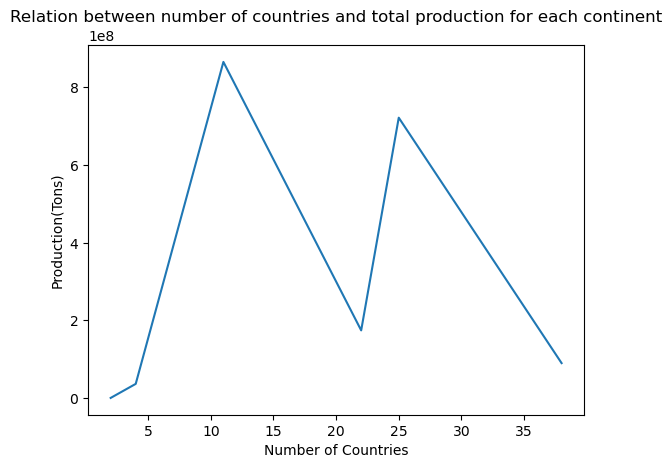

In [77]:
x = df.groupby("Continent")["Country"].count()
y = df.groupby("Continent")["Production(Tons)"].sum()
sns.lineplot(data =df,x=x,y=y)
plt.xlabel("Number of Countries")
plt.title("Relation between number of countries and total production for each continent")
plt.show()

In [78]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

#### Do continent with highest land produce more sugarcane ?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

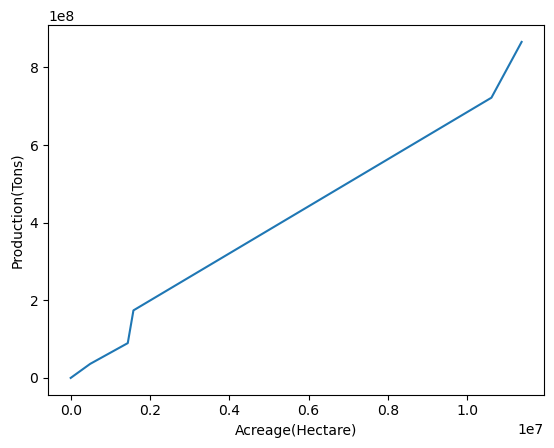

In [80]:
sns.lineplot(x = df.groupby("Continent")["Acreage(Hectare)"].sum(),y = df.groupby("Continent")["Production(Tons)"].sum())

In [81]:
df.groupby("Continent").sum().corr(numeric_only=True)

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Percentage_prod
Production(Tons),1.000000,0.143100,0.994897,0.091201,1.000000
Production_per_person(Kg),0.143100,1.000000,0.073059,0.541229,0.143100
Acreage(Hectare),0.994897,0.073059,1.000000,0.111166,0.994897
Yield(Kg / Hectare),0.091201,0.541229,0.111166,1.000000,0.091201
Percentage_prod,1.000000,0.143100,0.994897,0.091201,1.000000


In [82]:
df.groupby("Continent").sum()

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Percentage_prod
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472,10144110,1439089,2142107.5,4.751640
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425,3120808,10608319,1171871.4,38.250414
Europe,PortugalSpain,5823,536,71,131870.9,0.000309
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947,15420953,1581983,1082602.4,9.218918
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574,3158066,490909,162419.1,1.916815
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126,10228540,11369236,677192.7,45.861905


#### Production distribution by continent

<Axes: ylabel='Production(Tons)'>

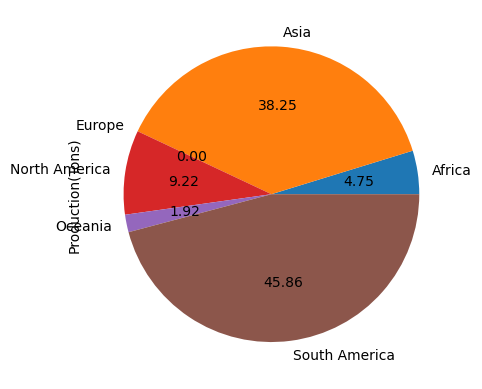

In [84]:
df.groupby("Continent").sum()["Production(Tons)"].plot(kind="pie",autopct="%0.2f")